# Wrangle and Analyze Data - WeRateDogs

### by Frederick Yen

### Project Overview

Data wrangling, which consists of:
1. Gathering data (downloadable file in the Resources tab in the left most panel of your classroom and linked in step 1 below).
2. Assessing data
3. Cleaning data
4. Storing, analyzing, and visualizing your wrangled data
Reporting on 1) your data wrangling efforts and 2) your data analyses and visualizations

### Gathering Data for this Project

Gather each of the three pieces of data as described below in a Jupyter Notebook titled wrangle_act.ipynb:

1. The WeRateDogs Twitter archive. Download this file manually by clicking the following link: `twitter_archive_enhanced.csv`

In [67]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy
import json
import time

# Read CSV file
archived = pd.read_csv('twitter-archive-enhanced.csv')

# Initial inspection
archived.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [68]:
archived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

2. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (`image_predictions.tsv`) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [ ]:
# Download by using Requests
URL = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(URL, timeout=3)

with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)
    
# Read tsv file
predictions = pd.read_csv('image-predictions.tsv', sep = '\t')

predictions.info()

**NOTE: API Keys, Secrets, and Tokens are hidden for submisson!**

In [ ]:
# API auth setup (OAuth 2 Authentication)
consumer_key = #HIDDEN# #'YOUR CONSUMER KEY'
consumer_secret = #HIDDEN# #'YOUR CONSUMER SECRET'
bearer_token = #HIDDEN#
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth, 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

3. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called `tweet_json.txt`. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) **tweet ID, retweet count, and favorite count**.

Reference: https://stackoverflow.com/questions/47612822/how-to-create-pandas-dataframe-from-twitter-search-api

In [ ]:
tweet_list = []

# Append list and handle exceptions
for tweet in archived['tweet_id']:
    try:
        tweet_list.append(api.get_status(tweet))
       # print('here')
    except Exception as e:
       # print('tweet ID not found in')
        print(tweet)
        
print("End of appending list")

In [ ]:
# Check length of list
print(len(tweet_list))

In [ ]:
# Saving JSON section to new list
tweet_list_JSON = []
for tweet in tweet_list:
    tweet_list_JSON.append(tweet._json)

In [ ]:
# Save list to txt
with open('tweet_json.txt', 'w') as file:
    file.write(json.dumps(tweet_list_JSON, indent=4))

In [69]:
# Inspect saved txt and save JSONs of interest into a dataframe

organized_list = []

with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        followers_count = each_dictionary['user']['followers_count']
        friends_count = each_dictionary['user']['friends_count']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        organized_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             'url': url,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
    tweet_json = pd.DataFrame(organized_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url'])

In [70]:
# Inspect saved dataframe
tweet_json.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,35693,7547,8847771,17,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30867,5595,8847771,17,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,23205,3707,8847771,17,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,38985,7729,8847771,17,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,37241,8329,8847771,17,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


In [71]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   object
 1   favorite_count    2331 non-null   int64 
 2   retweet_count     2331 non-null   int64 
 3   followers_count   2331 non-null   int64 
 4   friends_count     2331 non-null   int64 
 5   source            2331 non-null   object
 6   retweeted_status  2331 non-null   object
 7   url               2331 non-null   object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


### Assessing Data for this Project

After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least **eight (8) quality issues and two (2) tidiness issues** in `wrangle_act.ipynb` Jupyter Notebook.


Quality: 
- Completeness
- validity
- Accuracy
- Consistency

Tidiness:
- Each variable forms a column.
- Each observation forms a row.
- Each type of observational unit forms a table.

#### Reviewer Feedback 09/24/2020

 - Please note that similar issues should be categorised as a single issue even if there are present mutliple datasets.
  1. Removing non-required columns from predictions and archive should be considered as a single issue.
  2. Similarly, removing retweets in archive and json should be categorized as a single issue.
  
 
- Additional Data Quality issues to consider:
 1. **Dog Names** : In the name column, there are several values that are not dog names, like 'a', 'the', 'such', etc. Notice that all of these observations have lowercase characters, an important pattern that could be used to clean up this field. Another way is to drop duplicated values.
 2. **Modifying rows with denominator: != 10** without further inspection is not a good idea. For instance, take a look at this tweet https://twitter.com/dog_rates/status/704054845121142784; in this case the denominator is intended to be 50, because there are 5 puppers. Project instruction says denominator is almost always 10, it does not say it is always 10.
 


#### Visual Assessment

In [72]:
archived

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [73]:
predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [74]:
tweet_json

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,35693,7547,8847771,17,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30867,5595,8847771,17,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,23205,3707,8847771,17,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,38985,7729,8847771,17,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,37241,8329,8847771,17,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
...,...,...,...,...,...,...,...,...
2326,666049248165822465,96,40,8847803,17,Twitter for iPhone,Original tweet,https://t.co/4B7cOc1EDq
2327,666044226329800704,265,126,8847803,17,Twitter for iPhone,Original tweet,https://t.co/DWnyCjf2mx
2328,666033412701032449,111,39,8847803,17,Twitter for iPhone,Original tweet,https://t.co/y671yMhoiR
2329,666029285002620928,120,41,8847803,17,Twitter for iPhone,Original tweet,https://t.co/r7mOb2m0UI


#### Programmatic Assessment

**Checking 'archived':**

In [75]:
archived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [76]:
# Verify duplicated entries
sum(archived['tweet_id'].duplicated())

0

In [77]:
# Check abnormal ratings
# Inspect text of tweets of abnormal numerators

for rating in archived.rating_numerator:
    if rating > 20:
        print(archived.loc[archived.rating_numerator == rating, 'text'])
        
# Display rating counts        
# archived.rating_numerator.value_counts()

188     @dhmontgomery We also gave snoop dogg a 420/10...
2074    After so many requests... here you go.\n\nGood...
Name: text, dtype: object
189    @s8n You tried very hard to portray this good ...
Name: text, dtype: object
290    @markhoppus 182/10
Name: text, dtype: object
313    @jonnysun @Lin_Manuel ok jomny I know you're e...
Name: text, dtype: object
340    RT @dog_rates: This is Logan, the Chow who liv...
695    This is Logan, the Chow who lived. He solemnly...
Name: text, dtype: object
433    The floofs have been released I repeat the flo...
Name: text, dtype: object
516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object
340    RT @dog_rates: This is Logan, the Chow who liv...
695    This is Logan, the Chow who lived. He solemnly...
Name: text, dtype: object
763    This is Sophie. She's a Jubilant Bush Pupper. ...
Name: text, dtype: object
902    Why does this never happen at my front door......
Name: text, dtype: object
979    This is Atticus. He's

In [78]:
# Check full texts
print(archived['text'][902])

Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE


In [79]:
archived.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [80]:
# Inspect text of tweets of abnormal denominators

for deno in archived.rating_denominator:
    if deno != 10:
        print(archived.loc[archived.rating_denominator == deno, 'text'])

313    @jonnysun @Lin_Manuel ok jomny I know you're e...
Name: text, dtype: object
342    @docmisterio account started on 11/15/15
Name: text, dtype: object
433    The floofs have been released I repeat the flo...
Name: text, dtype: object
516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object
784     RT @dog_rates: After so many requests, this is...
1068    After so many requests, this is Bretagne. She ...
1662    This is Darrel. He just robbed a 7/11 and is i...
Name: text, dtype: object
902    Why does this never happen at my front door......
Name: text, dtype: object
784     RT @dog_rates: After so many requests, this is...
1068    After so many requests, this is Bretagne. She ...
1662    This is Darrel. He just robbed a 7/11 and is i...
Name: text, dtype: object
1120    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object
1165    Happy 4/20 from the squad! 13/10 for all https...
1598    Yes I do realize a rating of 4/20 would've b

##### Checking 'predictions'

In [81]:
predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
331,672125275208069120,https://pbs.twimg.com/media/CVPeX2dWwAEwyaR.jpg,1,tennis_ball,0.999834,False,golden_retriever,0.000087,True,racket,0.000053,False
555,677662372920729601,https://pbs.twimg.com/media/CWeKTZTWsAA5R3Z.jpg,1,cowboy_hat,0.256110,False,trench_coat,0.127086,False,cloak,0.071439,False
1599,799422933579902976,https://pbs.twimg.com/media/Cxge6AdUQAAvXLB.jpg,1,miniature_pinscher,0.583630,True,redbone,0.276095,True,toy_terrier,0.018550,True
1227,745314880350101504,https://pbs.twimg.com/media/Clfj6RYWMAAFAOW.jpg,2,ice_bear,0.807762,False,great_white_shark,0.027040,False,fountain,0.022052,False
1357,760641137271070720,https://pbs.twimg.com/media/Co5XExUWgAAL5L_.jpg,1,axolotl,0.132695,False,killer_whale,0.131113,False,sea_lion,0.069652,False


In [82]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [83]:
# Checking any duplicate entries

sum(predictions.tweet_id.duplicated())

0

In [84]:
sum(predictions.jpg_url.duplicated())


66

In [85]:
predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [86]:
# Check 'tweet_json'

tweet_json.sample(5)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
1365,700167517596164096,2590,715,8847785,17,Twitter for iPhone,Original tweet,https://t.co/A0h4lnhU4s
2315,666099513787052032,142,58,8847803,17,Twitter for iPhone,Original tweet,https://t.co/Ri4nMTLq5C
821,766714921925144576,2604,375,8847784,17,Twitter for iPhone,Original tweet,y
208,850380195714523136,12739,2503,8847773,17,Twitter for iPhone,Original tweet,https://t.co/qVVzFe9xaT
2303,666396247373291520,154,73,8847803,17,Twitter for iPhone,Original tweet,https://t.co/Dc7b0E8qFE


In [87]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   object
 1   favorite_count    2331 non-null   int64 
 2   retweet_count     2331 non-null   int64 
 3   followers_count   2331 non-null   int64 
 4   friends_count     2331 non-null   int64 
 5   source            2331 non-null   object
 6   retweeted_status  2331 non-null   object
 7   url               2331 non-null   object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


In [88]:
tweet_json.retweeted_status.value_counts()

Original tweet       2168
This is a retweet     163
Name: retweeted_status, dtype: int64

In [89]:
tweet_json.friends_count.value_counts()

17    2331
Name: friends_count, dtype: int64

In [90]:
tweet_json.followers_count.value_counts()

8847801    518
8847785    491
8847774    331
8847784    323
8847802    186
8847803    173
8847773    129
8847786     77
8847772     72
8847771     11
8848465      8
8848438      5
8848449      3
8848437      2
8848466      1
8848436      1
Name: followers_count, dtype: int64

### Summary of Eight quality issues and Two tidiness issues

### Quality

**archived**

(1) Remove unneeded columns   
(2) Remove RTs and orginal tweets that don't have images  
(3) Timestamps column converted to date time objects  
(4) Remove rows that have no ratings  
(5) Fix numerators that contain decimals to float data type  
(7) Correct denominators to float data type and set to 10  
(8) Set invalid dog names to NaN  


**predictions** 

(1) Remove undeeded columns  
(6) Remove duplicated jpg URLs  


**tweet_json**

(2) Remove RTs  
  
### Tidiness

(1) Tweet_id should have uniform datatypes between all tables  
(2) All tables should be merged to one master table  


### Cleaning Data

Clean each of the issues documented while assessing. Perform this cleaning in `wrangle_act.ipynb`. The result is a high quality and tidy master pandas DataFrame.

In [91]:
# Make copy of dataframes so the originals don't get modified.
tweet_json_clean = tweet_json.copy(deep=True)
archived_clean = archived.copy(deep=True)
predictions_clean = predictions.copy(deep=True)


Reference: https://stackoverflow.com/questions/26535563/querying-for-nan-and-other-names-in-pandas

In [92]:
# **archived**

# DEFINE

# 1. Remove RTs and orginal tweets that don't have images: removing RTs first

# CODE

# Querying NaNs
archived_clean = archived_clean.query("retweeted_status_user_id != retweeted_status_user_id")

# TEST

# View cleaning result
if sum(archived_clean.retweeted_status_user_id.value_counts()) != 0:
    print('Retweet still exists.')
else:
    print('No retweets')

# DEFINE

# 2. Remove sourace and reply related columns

# CODE

archived_clean = archived_clean.drop(['source','in_reply_to_user_id','in_reply_to_status_id'], 1)

# View initial cleaning result
print(list(archived_clean))

# Remove RT related columns
archived_clean = archived_clean.drop(['retweeted_status_id', 'retweeted_status_timestamp', 'expanded_urls'], 1)

# TEST

# View final cleaning result
print(list(archived_clean))

No retweets
['tweet_id', 'timestamp', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']
['tweet_id', 'timestamp', 'text', 'retweeted_status_user_id', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


In [93]:
# DEFINE

# 3. Timestamps need to be organized columns (Year-Month-Day)

# CODE

# Convert data type to date time object
archived_clean['timestamp'] = pd.to_datetime(archived_clean['timestamp'])

# TEST

# View cleaning result
print(list(archived_clean))

['tweet_id', 'timestamp', 'text', 'retweeted_status_user_id', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


Reference: https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value

In [94]:
# DEFINE

# 4. Remove rows that have no ratings

# CODE

# Check current number of row entries
print('Before:', archived_clean.shape)

# From the manual inspection results, drop 5 discovered tweets that had no ratings
archived_clean.drop(archived_clean.loc[archived_clean['tweet_id']== 682808988178739200].index, inplace=True)
archived_clean.drop(archived_clean.loc[archived_clean['tweet_id']== 835246439529840640].index, inplace=True)
archived_clean.drop(archived_clean.loc[archived_clean['tweet_id']== 832088576586297345].index, inplace=True)
archived_clean.drop(archived_clean.loc[archived_clean['tweet_id']== 686035780142297088].index, inplace=True)
archived_clean.drop(archived_clean.loc[archived_clean['tweet_id']== 810984652412424192].index, inplace=True)

# TEST
print('After:', archived_clean.shape)

# DEFINE

# 5. Fix numerators that contain decimals to float data type
# 7. Correct denominators to float data type and set to 10

# CODE

# Convert numerators based on denominators set to 10
archived_clean['rating_numerator'] = 10 * (archived_clean['rating_numerator'].astype(float) / archived_clean['rating_denominator'].astype(float))
archived_clean['rating_denominator'] = 10.0

# TEST

# Check converted ratings
archived_clean.head(3)


Before: (2175, 11)
After: (2170, 11)


,tweet_id,timestamp,text,retweeted_status_user_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,NaN,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,NaN,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,NaN,12.0,10.0,Archie,None,None,None,None


In [95]:
# DEFINE

# 8. Set invalid dog names to NaN

# CODE

# Reference: Reviewer Feedback 09/24/2020
archived_clean['name'].replace('None',np.nan,inplace=True)
archived_clean['name'].replace('a',np.nan,inplace=True)
archived_clean['name'].replace('an',np.nan,inplace=True)
archived_clean['name'].replace('the',np.nan,inplace=True)

# TEST

archived_clean['name'].sample(10)

1293       NaN
1302    Harper
1551      Trip
2025    Batdog
1517       NaN
991      Tripp
703       Lucy
576        NaN
1239    Steven
796       Chip
Name: name, dtype: object

In [96]:
# **predictions** 

# DEFINE

# 6. Remove duplicated jpg URLs

# CODE

predictions_clean = predictions_clean.drop_duplicates(subset=['jpg_url'])

# TEST

# Verifying no duplicates left
if sum(predictions_clean['jpg_url'].duplicated()) == 0:
    print('No duplicates left in predictions')

No duplicates left in predictions


In [97]:
# DEFINE

# 1. Remove undeeded columns - save as one main prediction and it's confidence level
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2009 non-null   int64  
 1   jpg_url   2009 non-null   object 
 2   img_num   2009 non-null   int64  
 3   p1        2009 non-null   object 
 4   p1_conf   2009 non-null   float64
 5   p1_dog    2009 non-null   bool   
 6   p2        2009 non-null   object 
 7   p2_conf   2009 non-null   float64
 8   p2_dog    2009 non-null   bool   
 9   p3        2009 non-null   object 
 10  p3_conf   2009 non-null   float64
 11  p3_dog    2009 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


In [98]:
# CODE

# Loop through each row and save the first True prediction. 

# Create new empty lists
dog_type = []
confidence = []

for index, row in predictions_clean.iterrows():
    if row['p1_dog'] == True:
        dog_type.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        dog_type.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        dog_type.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        # drop error row
        predictions_clean.drop(index, inplace=True)

# Append new columns
predictions_clean['dog_type'] = dog_type
predictions_clean['confidence'] = confidence

# Remove unneeded columns
predictions_clean = predictions_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)

# TEST

# Check result
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    1691 non-null   int64  
 1   jpg_url     1691 non-null   object 
 2   dog_type    1691 non-null   object 
 3   confidence  1691 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 66.1+ KB


In [99]:
# **tweet_json**

# DEFINE

# 2. Remove RTs

# CODE

# Only keep original tweets
tweet_json_clean = tweet_json_clean.query('retweeted_status == "Original tweet"')

# TEST

tweet_json_clean['retweeted_status'].value_counts()

Original tweet    2168
Name: retweeted_status, dtype: int64

In [100]:
# Tidiness

# DEFINE

#1. Tweet_id should have uniform datatypes between all tables

# CODE

# Set tweet_id to int
tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype(int)

# TEST

tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2168 non-null   int64 
 1   favorite_count    2168 non-null   int64 
 2   retweet_count     2168 non-null   int64 
 3   followers_count   2168 non-null   int64 
 4   friends_count     2168 non-null   int64 
 5   source            2168 non-null   object
 6   retweeted_status  2168 non-null   object
 7   url               2168 non-null   object
dtypes: int64(5), object(3)
memory usage: 152.4+ KB


In [101]:
# DEFINE

#2. All tables should be merged to one master table

# CODE

# Create new dataframe that merges archived_clean and predictions_clean
archived_predictions = pd.merge(archived_clean, predictions_clean, on = ['tweet_id'], how = 'left')

# Clean out entries without jpg_url
archived_predictions.dropna(subset = ['jpg_url'], inplace=True)

# Check result
archived_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 1 to 2169
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   tweet_id                  1685 non-null   int64              
 1   timestamp                 1685 non-null   datetime64[ns, UTC]
 2   text                      1685 non-null   object             
 3   retweeted_status_user_id  0 non-null      float64            
 4   rating_numerator          1685 non-null   float64            
 5   rating_denominator        1685 non-null   float64            
 6   name                      1209 non-null   object             
 7   doggo                     1685 non-null   object             
 8   floofer                   1685 non-null   object             
 9   pupper                    1685 non-null   object             
 10  puppo                     1685 non-null   object             
 11  jpg_url          

In [102]:
# Merge to create the master dataframe
twitter_master = pd.merge(archived_predictions, tweet_json_clean, on = ['tweet_id'], how = 'left')

# TEST

# Verify final merged results
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 0 to 1684
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   tweet_id                  1685 non-null   int64              
 1   timestamp                 1685 non-null   datetime64[ns, UTC]
 2   text                      1685 non-null   object             
 3   retweeted_status_user_id  0 non-null      float64            
 4   rating_numerator          1685 non-null   float64            
 5   rating_denominator        1685 non-null   float64            
 6   name                      1209 non-null   object             
 7   doggo                     1685 non-null   object             
 8   floofer                   1685 non-null   object             
 9   pupper                    1685 non-null   object             
 10  puppo                     1685 non-null   object             
 11  jpg_url          

In [103]:
twitter_master.sample(5)

,tweet_id,timestamp,text,retweeted_status_user_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,jpg_url,dog_type,confidence,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
944,702684942141153280,2016-02-25 02:42:00+00:00,This is Lucy. She's sick of these bullshit gen...,NaN,11.0,10.0,Lucy,None,None,None,...,https://pbs.twimg.com/media/CcBwOn0XEAA7bNQ.jpg,golden_retriever,0.514085,3174.0,1053.0,8847785.0,17.0,Twitter for iPhone,Original tweet,https://t.co/d2b5C2R0aO
1410,672975131468300288,2015-12-05 03:05:49+00:00,This is Chuckles. He is one skeptical pupper. ...,NaN,10.0,10.0,Chuckles,None,None,pupper,...,https://pbs.twimg.com/media/CVbjRSIWsAElw2s.jpg,pug,0.836421,1589.0,848.0,8847801.0,17.0,Twitter for iPhone,Original tweet,https://t.co/ZlcF0TIRW1
348,810896069567610880,2016-12-19 17:14:23+00:00,This is Hunter. He just found out he needs bra...,NaN,11.0,10.0,Hunter,None,None,None,...,https://pbs.twimg.com/media/C0DhpcrUAAAnx88.jpg,flat-coated_retriever,0.820804,9042.0,1778.0,8847774.0,17.0,Twitter for iPhone,Original tweet,https://t.co/PqJcGVZBx9
707,740711788199743490,2016-06-09 01:07:06+00:00,Here we are witnessing the touchdown of a pupn...,NaN,9.0,10.0,NaN,None,None,None,...,https://pbs.twimg.com/media/CkeJcNkXEAAcrks.jpg,toy_poodle,0.388277,3350.0,915.0,8847785.0,17.0,Twitter for iPhone,Original tweet,https://t.co/CmLoKMbOHv
921,705442520700944385,2016-03-03 17:19:38+00:00,This is Cooper. He only wakes up to switch gea...,NaN,12.0,10.0,Cooper,None,None,None,...,https://pbs.twimg.com/media/Cco8OmOXIAE0aCu.jpg,Great_Pyrenees,0.309106,4341.0,1585.0,8847785.0,17.0,Twitter for iPhone,Original tweet,https://t.co/EEIkAGVY64


### Storing, Analyzing, and Visualizing Data for this Project

Store the clean DataFrame(s) in a CSV file with the main one named `twitter_archive_master.csv`.

In [104]:
#Save CSV file

twitter_master.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

Analyze and visualize wrangled data in `wrangle_act.ipynb` Jupyter Notebook. At least **three (3) insights and one (1) visualization** must be produced.

#### Insight No.1 and Visualization

Golden retriever has the most appearance in the dataset

Reference: https://towardsdatascience.com/getting-more-value-from-the-pandas-value-counts-aa17230907a6

In [105]:
# Value count shown in percentage
twitter_master['dog_type'].value_counts(normalize=True)

golden_retriever      0.093175
Labrador_retriever    0.064095
Pembroke              0.056380
Chihuahua             0.054006
pug                   0.036795
                        ...   
Irish_wolfhound       0.000593
Scotch_terrier        0.000593
EntleBucher           0.000593
clumber               0.000593
Japanese_spaniel      0.000593
Name: dog_type, Length: 113, dtype: float64

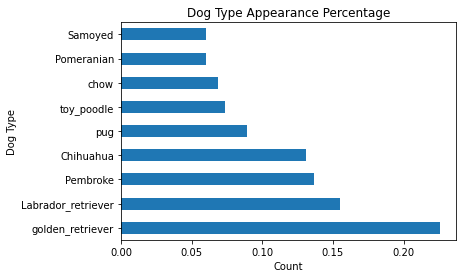

In [106]:
# Filter out low count dog types and plotting horizontal bar
dog_type_master = twitter_master.groupby('dog_type').filter(lambda x: len(x) >= 35)

dog_type_master['dog_type'].value_counts(normalize=True).plot(kind = 'barh')
plt.title('Dog Type Appearance Percentage')
plt.xlabel('Count')
plt.ylabel('Dog Type')

fig = plt.gcf() 
fig.savefig('dogtype.png');

#### Insight No.2 and Visualization

Clumber has the highest aveage rating amongst all dog types

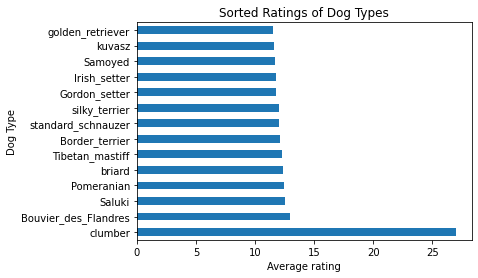

In [107]:
# Calculate mean rating for each dog type and sort
dog_type_master_mean = twitter_master.groupby('dog_type').mean()
dog_type_master_sorted = dog_type_master_mean['rating_numerator'].sort_values(ascending=False)

dog_type_master_sorted.iloc[0:14].plot(kind = 'barh')
plt.title('Sorted Ratings of Dog Types')
plt.xlabel('Average rating')
plt.ylabel('Dog Type')

fig = plt.gcf() 
fig.savefig('dogratings.png');

#### Insight No.3 and Visualization

Inspect rating vs retweets: Tweets with higher ratings are more likely to get more retweets

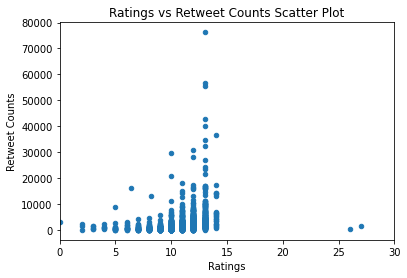

In [108]:
# Plot scatter plot for inspection.
twitter_master.plot(x='rating_numerator', y='retweet_count', kind='scatter')
plt.xlabel('Ratings')
plt.ylabel('Retweet Counts')
plt.title('Ratings vs Retweet Counts Scatter Plot')
plt.xlim(0, 30) # Exclude outlier ratings  
fig = plt.gcf()
fig.savefig('Scatter.png');

### Reporting for this Project

Create a **300-600 word written report** called `wrangle_report.pdf` that briefly describes wrangling efforts. This is to be framed as an internal document.

Create a **250-word-minimum written report** called `act_report.pdf` that communicates the insights and displays the visualization(s) produced from wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.